<a href="https://colab.research.google.com/github/DenizzEmre/loan-default-predictor/blob/main/Loan_Default_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition¶

The goal of this project is to analyze and address the challenges associated with loan defaults in the context of our lending institution. By leveraging data analysis and predictive modeling techniques, the project aims to optimize the loan approval process and reduce the risk of defaults.

## Table of Contents
- [Data](#Data)
- [Preprocessing](#Preprocessing)
- [Dummy Model](#Base)
- [Logistic Regression](#LR)
- [K-Nearest Neighbors (KNN) ](#KNN)
- [Support Vector Machines (SVM) ](#SVM)
- [Random Forests](#rf)
- [XGBoost ](#xgboost)
- [Decision Tree](#DecisionTree)
- [Neural Networks](#Neural)
- [Conclusion and Observations](#finale)






In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler


<a name="Data"></a>
## Data Insights

In [2]:
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [5]:
df.columns = [col.lower() for col in df.columns]  #to standartize it

In [6]:
# Check for dublicated values
df.duplicated().value_counts()

False    148670
dtype: int64

Now check the nulls:

In [7]:
df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
df.isnull().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

- We will deeply analyze null values in the section 'Preprocessing' and fill them with specific strategies. Now, we explore the data.

## Data Insights- Visualizations

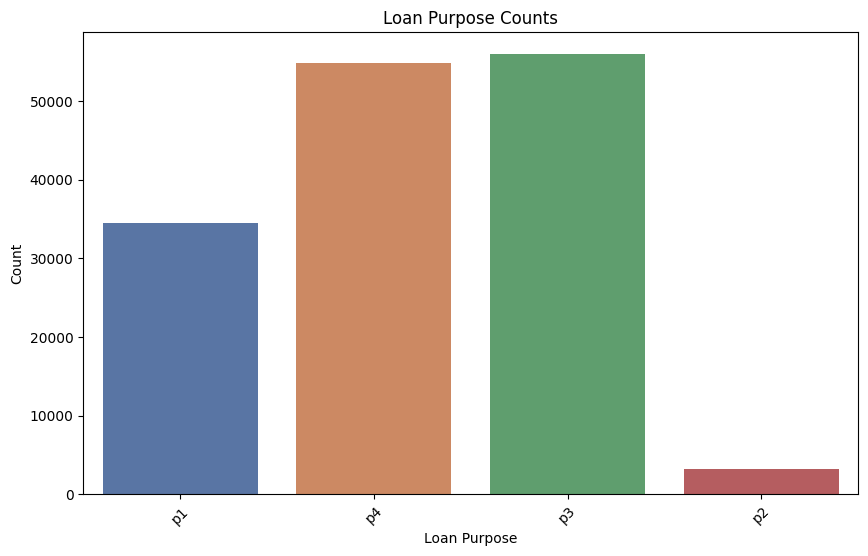

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_purpose', palette='deep')
plt.title('Loan Purpose Counts')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Loan purpose is not explicitly shown in the data. Note that loan purposes can be Home Purchases, Debt Consolidation, etc. Knowing the loan purpose is essential for a lender because it can significantly impact the loan application process, terms, and risk assessment.


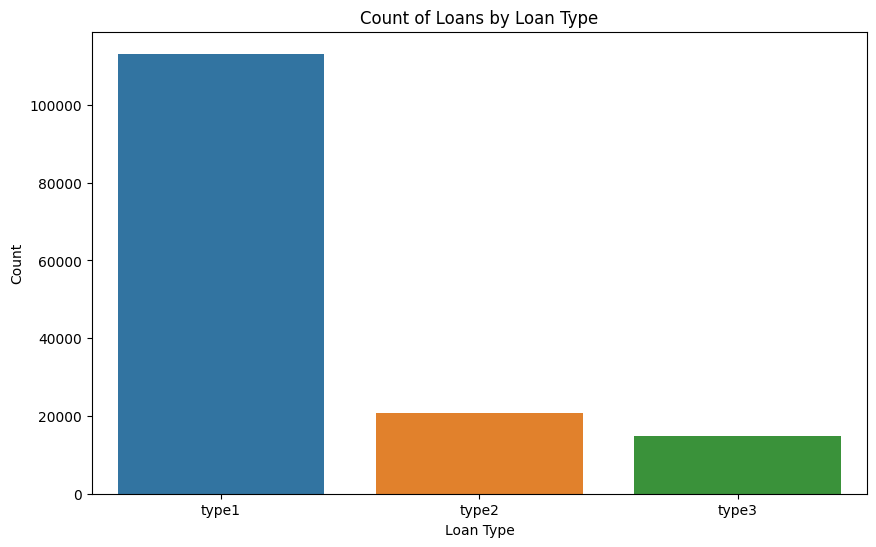

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_type')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.title('Count of Loans by Loan Type')
plt.show()


Similarly, Loan Types are also not shown explicitly. Note that loan types can be Personal, mortgage, auto, etc. The info not explicitly named in dta This will be discussed as a limitation in the following sections.

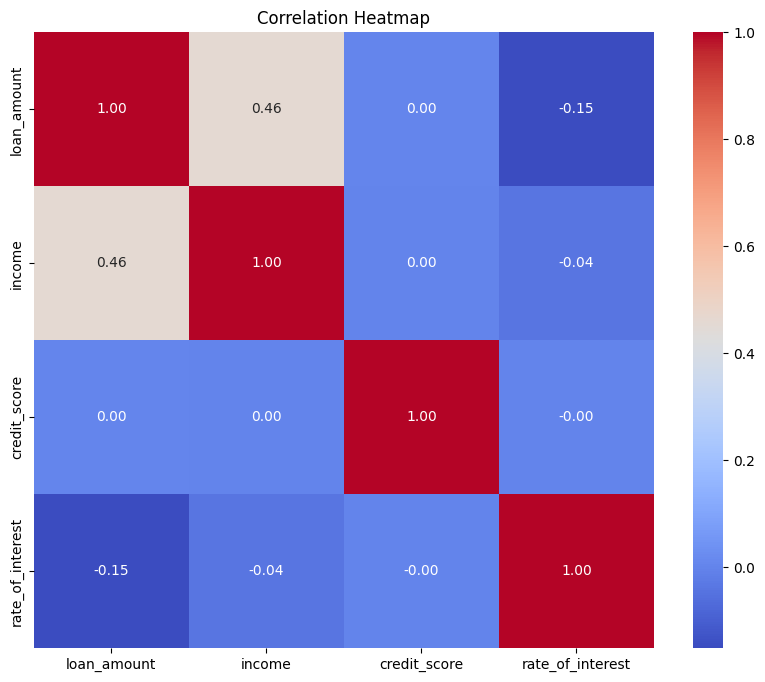

In [11]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['loan_amount', 'income', 'credit_score', 'rate_of_interest']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

These variables were chosen based on their importance in the context of loans and financial analysis. The goal is to gain insights into relationships and patterns within the data that are relevant to  analysis goals.

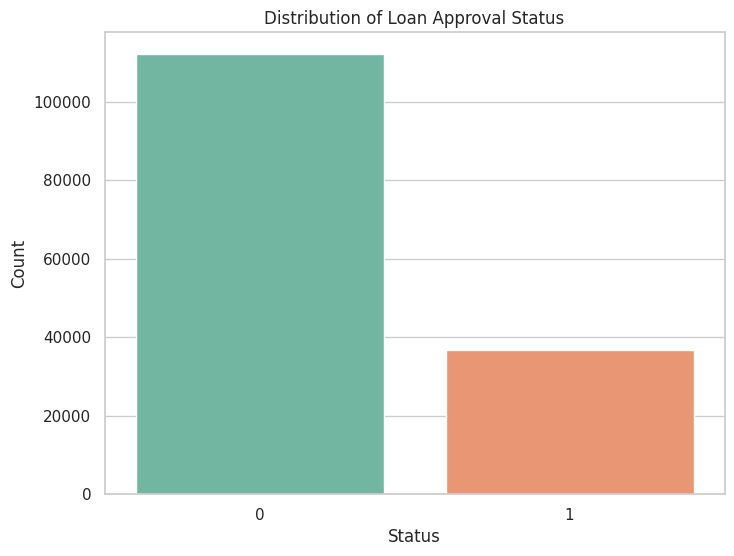

In [12]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot for the "Status" column
plt.figure(figsize=(8, 6))
sns.countplot(x="status", data=df, palette="Set2")

# Add labels and a title
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Distribution of Loan Approval Status")

# Show the plot
plt.show()


In [13]:
df["status"].value_counts(normalize=True)

0    0.753555
1    0.246445
Name: status, dtype: float64

**Observation:** There is an imbalance between classes. Therefore, I will address this imbalance in the preprocessing and modeling steps to ensure robust model performance.







##  Data Cleaning

**Gender Column:** Due to ethical considerations and potential legal restrictions (like those from the Equal Credit Opportunity Act in the U.S.), using gender as a predictor in loan default models is generally discouraged and could be considered discriminatory. Then drop the gender column.

In [14]:
# Drop the gender column
df = df.drop(columns='gender')

**Year Column:**  Let's analyze the effects of years.

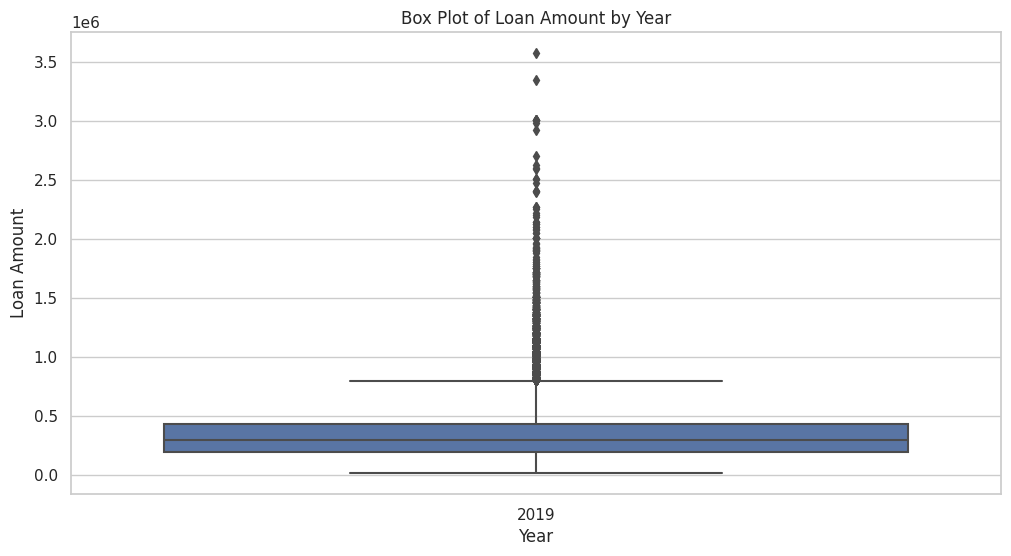

In [15]:
# Create a box plot for 'loan_amount' by year
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.boxplot(x='year', y='loan_amount', data=df)
plt.xlabel('Year')  # Set x-axis label
plt.ylabel('Loan Amount')  # Set y-axis label
plt.title('Box Plot of Loan Amount by Year')  # Set plot title

plt.show()



Above boxplot shows that the data mainly has the info from 2019. Lets double-check whether there is an outlier.

In [16]:
 #Filter rows where 'year' is different from 2019
different_years = df[df['year'] != 2019]

# Count the number of rows
count_different_years = len(different_years)

# Print the count and the IDs
print(f"Number of rows with year different from 2019: {count_different_years}")


Number of rows with year different from 2019: 0


So, there is only one spesific year, 2019,  therefore we cannot use year in time-analysis. Drop it.


In [17]:
df = df.drop(columns='year')

Here are more observations regarding construction_type and secured_by columns:

In [18]:
construction_type_counts = df['construction_type'].value_counts()
secured_by_counts=df['secured_by'].value_counts()
# Print the counts
print(construction_type_counts)
print(secured_by_counts)


sb    148637
mh        33
Name: construction_type, dtype: int64
home    148637
land        33
Name: secured_by, dtype: int64


**Interpretation:** Dropping these columns helps address class imbalance issues and ensures that the model focuses on more informative and balanced features, leading to improved model performance and interpretability.

In [19]:
df.drop(['id','secured_by', 'construction_type'], axis=1, inplace=True)


In [20]:
total_units_counts = df['total_units'].value_counts()

print(total_units_counts)


1U    146480
2U      1477
3U       393
4U       320
Name: total_units, dtype: int64


 - I will address class imbalance during preprocessing to retain the 'total_units' column and enhance model performance.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   approv_in_adv              147762 non-null  object 
 2   loan_type                  148670 non-null  object 
 3   loan_purpose               148536 non-null  object 
 4   credit_worthiness          148670 non-null  object 
 5   open_credit                148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           112231 non-null  float64
 9   interest_rate_spread       112031 non-null  float64
 10  upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  neg_ammortization          148549 non-null  object 
 13  interest_only              14

## Quick Summary until now

- Gender, ID, year, construction_type, secured_by are dropped.
- There are missing values and I will fill these values in a Pipeline in the modelling stage.  

<a name="Preprocessing"></a>
## Preprocessing

### Age is object!

Credit Behavior by Age Group: Different age groups might exhibit distinct credit behaviors. For example, younger borrowers might have a different default risk compared to older ones due to factors like job stability, income levels, and financial obligations.

In [22]:
# Convert age ranges to ordinal values
# Convert all entries in 'age' to strings and handle NaN values
df['age'] = df['age'].astype(str)

df['age'] = df['age'].replace('nan', 'unknown')

# Now we can sort the unique age range strings and create the ordinal mapping
age_ranges = sorted(df['age'].unique())
ordinal_age_mapping = {age_range: index for index, age_range in enumerate(age_ranges)}
df['age_ordinal'] = df['age'].map(ordinal_age_mapping)


**Remark:** Note that the alternative approach to above code is creating a pipeline as below:
***
### Define the encoding for the ordinal 'age' column

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[age_ranges]))  
])
***

In [23]:
# Drop the original age column
df = df.drop(columns=['age'])

In [24]:
# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Confirm the lists of categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['loan_limit', 'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness', 'open_credit', 'business_or_commercial', 'neg_ammortization', 'interest_only', 'lump_sum_payment', 'occupancy_type', 'total_units', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'region', 'security_type']

Numerical Columns:
['loan_amount', 'rate_of_interest', 'interest_rate_spread', 'upfront_charges', 'term', 'property_value', 'income', 'credit_score', 'ltv', 'status', 'dtir1', 'age_ordinal']


### Back to the missing values! Handling strategy.  

In [25]:
(df.isnull().sum()/len(df))*100

loan_limit                    2.249277
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
credit_worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
interest_rate_spread         24.644515
upfront_charges              26.664425
term                          0.027578
neg_ammortization             0.081388
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
occupancy_type                0.000000
total_units                   0.000000
income                        6.154571
credit_type                   0.000000
credit_score                  0.000000
co-applicant_credit_type      0.000000
submission_of_application     0.134526
ltv                          10.155378
region                        0.000000
security_type            

+ Given the missing data information, I want to have a dual approach of column-specific imputation coupled with pipeline integration. For columns with substantial missing values, such as rate_of_interest, Interest_rate_spread, Upfront_charges, property_value, LTV, and dtir1, an in-depth analysis to determine the appropriate imputation method is better.

+ Then, I plan to systematize the chosen imputation methods within a ColumnTransformer, ensuring a consistent and automated application of these methods to both the training and testing sets.


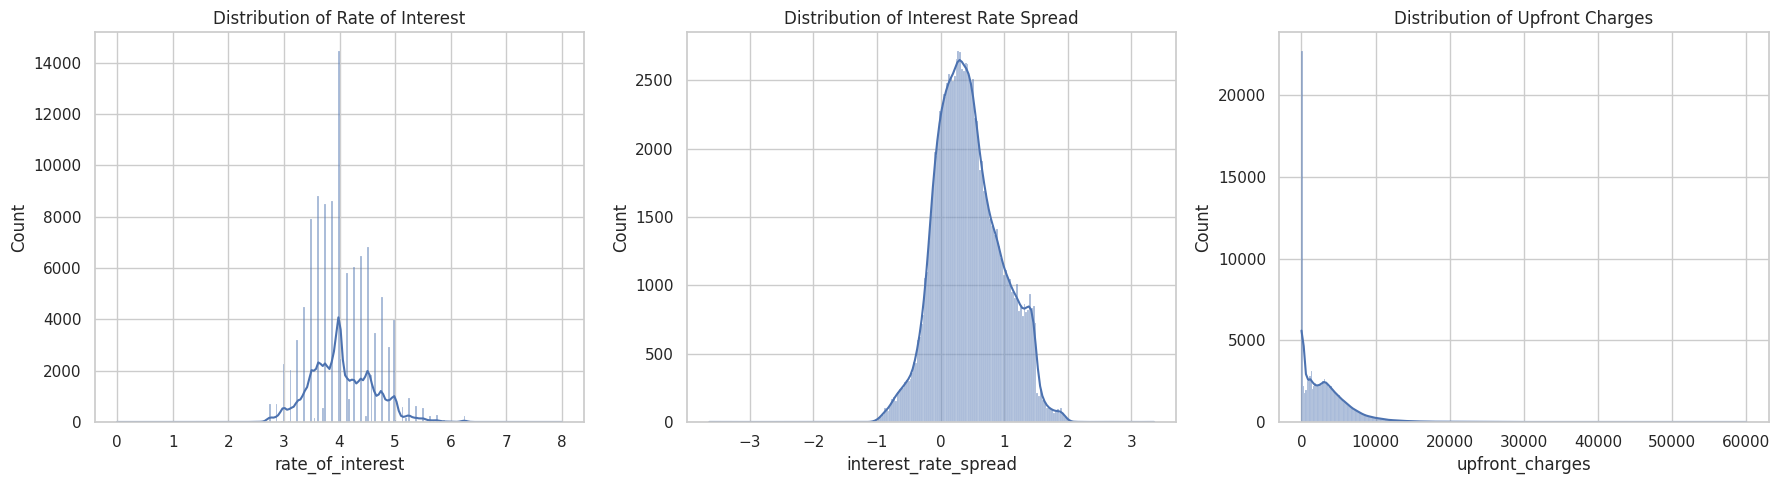

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with a specified figure size
plt.figure(figsize=(18, 5))

# Histogram for 'rate_of_interest'
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.histplot(df['rate_of_interest'].dropna(), kde=True)
plt.title('Distribution of Rate of Interest')

# Histogram for 'interest_rate_spread'
plt.subplot(1, 3, 2)
sns.histplot(df['interest_rate_spread'].dropna(), kde=True)
plt.title('Distribution of Interest Rate Spread')

# Histogram for 'upfront_charges'
plt.subplot(1, 3, 3)
sns.histplot(df['upfront_charges'].dropna(), kde=True)
plt.title('Distribution of Upfront Charges')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


Explanation of above histograms:
+ The "Rate of Interest" and "Interest Rate Spread" features, exhibiting normal distributions, are well-suited for mean imputation when addressing missing values. The mean is a reliable indicator of central tendency for symmetric distributions, offering a balanced central point that reflects the typical values of these features.

+ Conversely, "Upfront Charges" display a right-skewed distribution, suggesting that a significant number of very high values are pulling the mean to the right. Therefore, the median, which is not swayed by such outliers, is a better choice for imputation. Using the median ensures that the imputed values align more closely with the most common range of the data, preserving its original distributional characteristics.

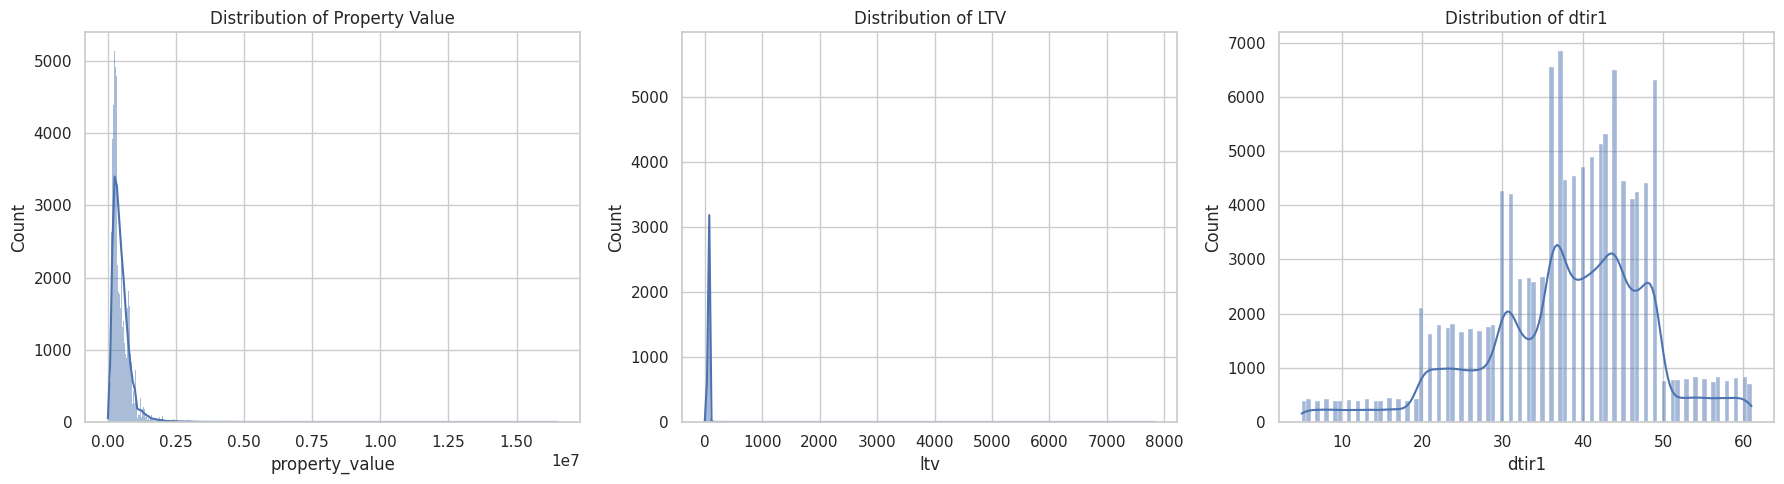

In [27]:
# Set up the matplotlib figure with a specified figure size
plt.figure(figsize=(18, 5))

# Histogram for 'property_value'
plt.subplot(1, 3, 1)  # (rows, columns, panel number)
sns.histplot(df['property_value'].dropna(), kde=True)
plt.title('Distribution of Property Value')

# Histogram for 'LTV'
plt.subplot(1, 3, 2)
sns.histplot(df['ltv'].dropna(), kde=True)
plt.title('Distribution of LTV')

# Histogram for 'dtir1'
plt.subplot(1, 3, 3)
sns.histplot(df['dtir1'].dropna(), kde=True)
plt.title('Distribution of dtir1')


# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


* We will have the similar approach explained for previous histograms. Detailed operations will be performed in the preprocess stage.

In [28]:
from sklearn.impute import SimpleImputer

# Separate columns with different imputation strategies
columns_to_fill_with_mean = ['rate_of_interest', 'interest_rate_spread', 'dtir1']
columns_to_fill_with_median = ['upfront_charges', 'property_value', 'ltv', 'income']

# Impute columns that need mean imputation
mean_imputer = SimpleImputer(strategy='mean')
df[columns_to_fill_with_mean] = mean_imputer.fit_transform(df[columns_to_fill_with_mean])

# Impute columns that need median imputation
median_imputer = SimpleImputer(strategy='median')
df[columns_to_fill_with_median] = median_imputer.fit_transform(df[columns_to_fill_with_median])



In [29]:
(df.isnull().sum()/len(df))*100

loan_limit                   2.249277
approv_in_adv                0.610749
loan_type                    0.000000
loan_purpose                 0.090133
credit_worthiness            0.000000
open_credit                  0.000000
business_or_commercial       0.000000
loan_amount                  0.000000
rate_of_interest             0.000000
interest_rate_spread         0.000000
upfront_charges              0.000000
term                         0.027578
neg_ammortization            0.081388
interest_only                0.000000
lump_sum_payment             0.000000
property_value               0.000000
occupancy_type               0.000000
total_units                  0.000000
income                       0.000000
credit_type                  0.000000
credit_score                 0.000000
co-applicant_credit_type     0.000000
submission_of_application    0.134526
ltv                          0.000000
region                       0.000000
security_type                0.000000
status      

The features with major missing values are imputed. I will perform the imputing method for remaining features (low missing value percentages) in the pipeline design.

In [30]:
## The class for model evaluations
from sklearn.model_selection import cross_val_score, StratifiedKFold
class EvaluationMetrics:
    #model_df =[]
    model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Train Recall', 'Train Precision', 'Train F1-Score',
                                              'Train Log Loss','Test Accuracy', 'Test Recall', 'Test Precision', 'Test F1-Score',
                                              'Test Log Loss', 'Validation Accuracy', 'Validation Recall', 'Validation Precision',
                                              'Validation F1-Score'])

    def __init__(self, pipe, X_train, X_test, y_train, y_test, X_val, y_val):
        self.pipe = pipe
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.X_val = X_val
        self.y_val = y_val

    def print_scores(self):
        # Training set predictions
        y_train_pred = self.pipe.predict(self.X_train)
        y_train_pred_proba = self.pipe.predict_proba(self.X_train)
        train_results_dict = {'accuracy': accuracy_score(self.y_train, y_train_pred),
                              'recall': recall_score(self.y_train, y_train_pred, average='weighted'),
                              'precision': precision_score(self.y_train, y_train_pred, average='weighted'),
                              'f1_score': f1_score(self.y_train, y_train_pred, average='weighted'),
                              'log_loss': log_loss(self.y_train, y_train_pred_proba)}

        # Test set predictions
        y_test_pred = self.pipe.predict(self.X_test)
        y_test_pred_proba = self.pipe.predict_proba(self.X_test)
        test_results_dict = {'accuracy': accuracy_score(self.y_test, y_test_pred),
                             'recall': recall_score(self.y_test, y_test_pred, average='weighted'),
                             'precision': precision_score(self.y_test, y_test_pred, average='weighted'),
                             'f1_score': f1_score(self.y_test, y_test_pred, average='weighted'),
                             'log_loss': log_loss(self.y_test, y_test_pred_proba)}

        # Validation set predictions
        y_val_pred = self.pipe.predict(self.X_val)
        y_val_pred_proba = self.pipe.predict_proba(self.X_val)
        val_results_dict = {'accuracy': accuracy_score(self.y_val, y_val_pred),
                            'recall': recall_score(self.y_val, y_val_pred, average='weighted'),
                            'precision': precision_score(self.y_val, y_val_pred, average='weighted'),
                            'f1_score': f1_score(self.y_val, y_val_pred, average='weighted'),
                            'log_loss': log_loss(self.y_val, y_val_pred_proba)}

        return train_results_dict, test_results_dict, val_results_dict




    def cross_validation(self, cv=5, scoring='roc_auc'):
        # Using Stratified K-Folds for cross-validation
        stratified_cv = StratifiedKFold(n_splits=cv)

        # Perform cross-validation using the instance attributes
        scores = cross_val_score(self.pipe, self.X_train, self.y_train, cv=stratified_cv, scoring=scoring)

        return np.mean(scores), np.std(scores)


    # Plots ROC curve for all classes
    def plot_roc_curve_ovr(self):
        # Calculate FPR and TPR for each class (One-vs-Rest)
        y_test_pred_proba = self.pipe.predict_proba(self.X_test)
        n_classes = y_test_pred_proba.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(self.y_test, y_test_pred_proba[:, i], pos_label=i)

        # Plot ROC curve for each class (One-vs-Rest)
        plt.figure()
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - One-vs-Rest')
        plt.legend(loc="lower right")
        plt.show()

    # Plots confusion matrix
    def plot_confusion_matrix(self, y_train, y_train_pred):
        cm = confusion_matrix(y_train, y_train_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

    def record_results(self, model_name, train_results, test_results, val_results):
        new_row = {
            'Model': model_name,
            'Train Accuracy': train_results['accuracy'],
            'Train Recall': train_results['recall'],
            'Train Precision': train_results['precision'],
            'Train F1-Score': train_results['f1_score'],
            'Train Log Loss': train_results['log_loss'],
            'Test Accuracy': test_results['accuracy'],
            'Test Recall': test_results['recall'],
            'Test Precision': test_results['precision'],
            'Test F1-Score': test_results['f1_score'],
            'Test Log Loss': test_results['log_loss']
        }

        # Add validation results only if val_results is not None
        if val_results is not None:
            new_row.update({
                'Validation Accuracy': val_results['accuracy'],
                'Validation Recall': val_results['recall'],
                'Validation Precision': val_results['precision'],
                'Validation F1-Score': val_results['f1_score'],
                'Validation Log Loss': val_results['log_loss']
            })

        # Append the new row to the DataFrame
        new_row_df = pd.DataFrame(new_row, index=[0])
        self.model_df = pd.concat([self.model_df, new_row_df], ignore_index=True)

<a name="Base"></a>
## Dummy Classifier

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df.drop('status', axis=1),  # Drop the target variable to create features
    df['status'],               # Target variable
    random_state=0,             # Ensures reproducibility
    test_size=0.2,              # Proportion of dataset to include in initial train split
    stratify=df['status'],      # Ensures train and test sets have similar class distributions
    shuffle=True                # Shuffles the data before splitting
)

# Further split the temporary data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    random_state=0,             # Ensures reproducibility
    test_size=0.3,              # Proportion of dataset to include in validation split
    stratify=y_temp,            # Ensures validation and test sets have similar class distributions
    shuffle=True                # Shuffles the data before splitting
)

# Create a pipeline with a dummy classifier
pipeline_dummy = Pipeline([
    ('dummy_classifier', DummyClassifier(strategy='most_frequent'))  # You can choose different strategies
])

# Train the pipeline (dummy classifier)
pipeline_dummy.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_dummy.predict(X_test)

# Calculate accuracy as a baseline metric (replace with appropriate evaluation metrics)
accuracy = accuracy_score(y_test, y_pred)


# Now you can use EvaluationMetrics with X_train, X_test, y_train, y_test, X_val, y_val
dummy_metrics = EvaluationMetrics(pipeline_dummy, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = dummy_metrics.print_scores()
dummy_metrics.record_results('DummyModel', train_results, test_results, val_results)
dummy_metrics.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,DummyModel,0.753557,0.753557,0.567847,0.647652,8.882723,0.753503,0.753503,0.567767,0.64758,8.884653,0.753567,0.753567,0.567864,0.647667,8.882328


<a name="LR"></a>
## Logistic Regression

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define categorical and numerical features
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)  # Use categorical_features here
    ])

logistic_regression_classifier = LogisticRegression(
    random_state=42,
    class_weight='balanced'  # Use 'balanced' for automatic class weighting
)


pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', logistic_regression_classifier)
])

# Train the pipeline
pipeline_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_lr.predict(X_test)


- class_weight='balanced' in logistic regression automatically assigns weights inversely proportional to class frequencies in the input data. This means that in an imbalanced dataset, the minority class (class 1 in your case) automatically gets a higher weight, not the majority class (class 0). The goal is to increase the model's sensitivity to the minority class, which is typically underrepresented in an imbalanced dataset.

In [33]:
lr_metrics = EvaluationMetrics(pipeline_lr, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = lr_metrics.print_scores()
lr_metrics.record_results('Logistic Regression', train_results, test_results, val_results)
lr_metrics.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,Logistic Regression,0.834928,0.834928,0.837842,0.836245,0.413091,0.839368,0.839368,0.840609,0.839959,0.41132,0.833518,0.833518,0.836304,0.834784,0.418733


##Logistic Regression- features


-  Here, I want to see the importance of features to check whether they have similar patterns with the domain loan knowledge.


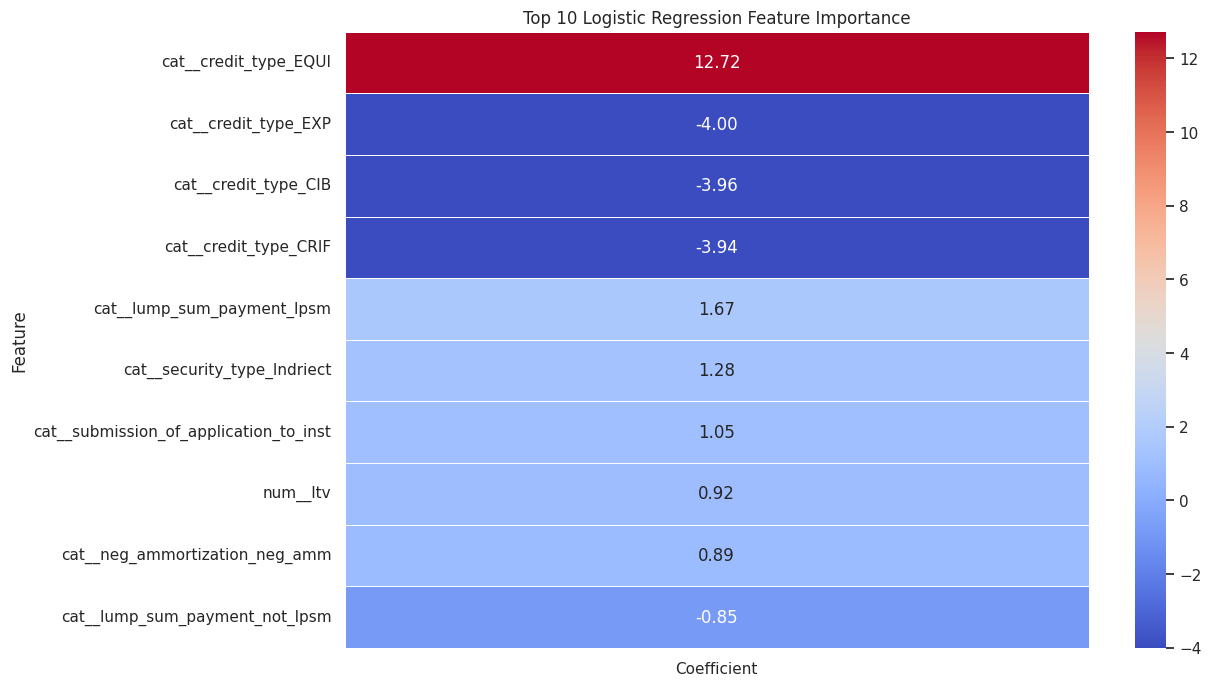

In [34]:
# Extract feature names and coefficients
logistic_regression_model = pipeline_lr.named_steps['classifier']
coefficients = logistic_regression_model.coef_[0]
feature_names = pipeline_lr.named_steps['preprocessor'].get_feature_names_out()
feature_importance = zip(feature_names, coefficients)
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Create a DataFrame to store the sorted feature names and coefficients
df_feature_importance = pd.DataFrame(sorted_features, columns=["Feature", "Coefficient"])

# Select and display only the top 10 features
top_n_features = df_feature_importance.head(10)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_n_features.set_index('Feature'), cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Top 10 Logistic Regression Feature Importance")
plt.show()



In [35]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [36]:
import pickle

# Save the logistic regression model
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(pipeline_lr, f)


In [37]:
from google.colab import files
files.download('logistic_regression_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

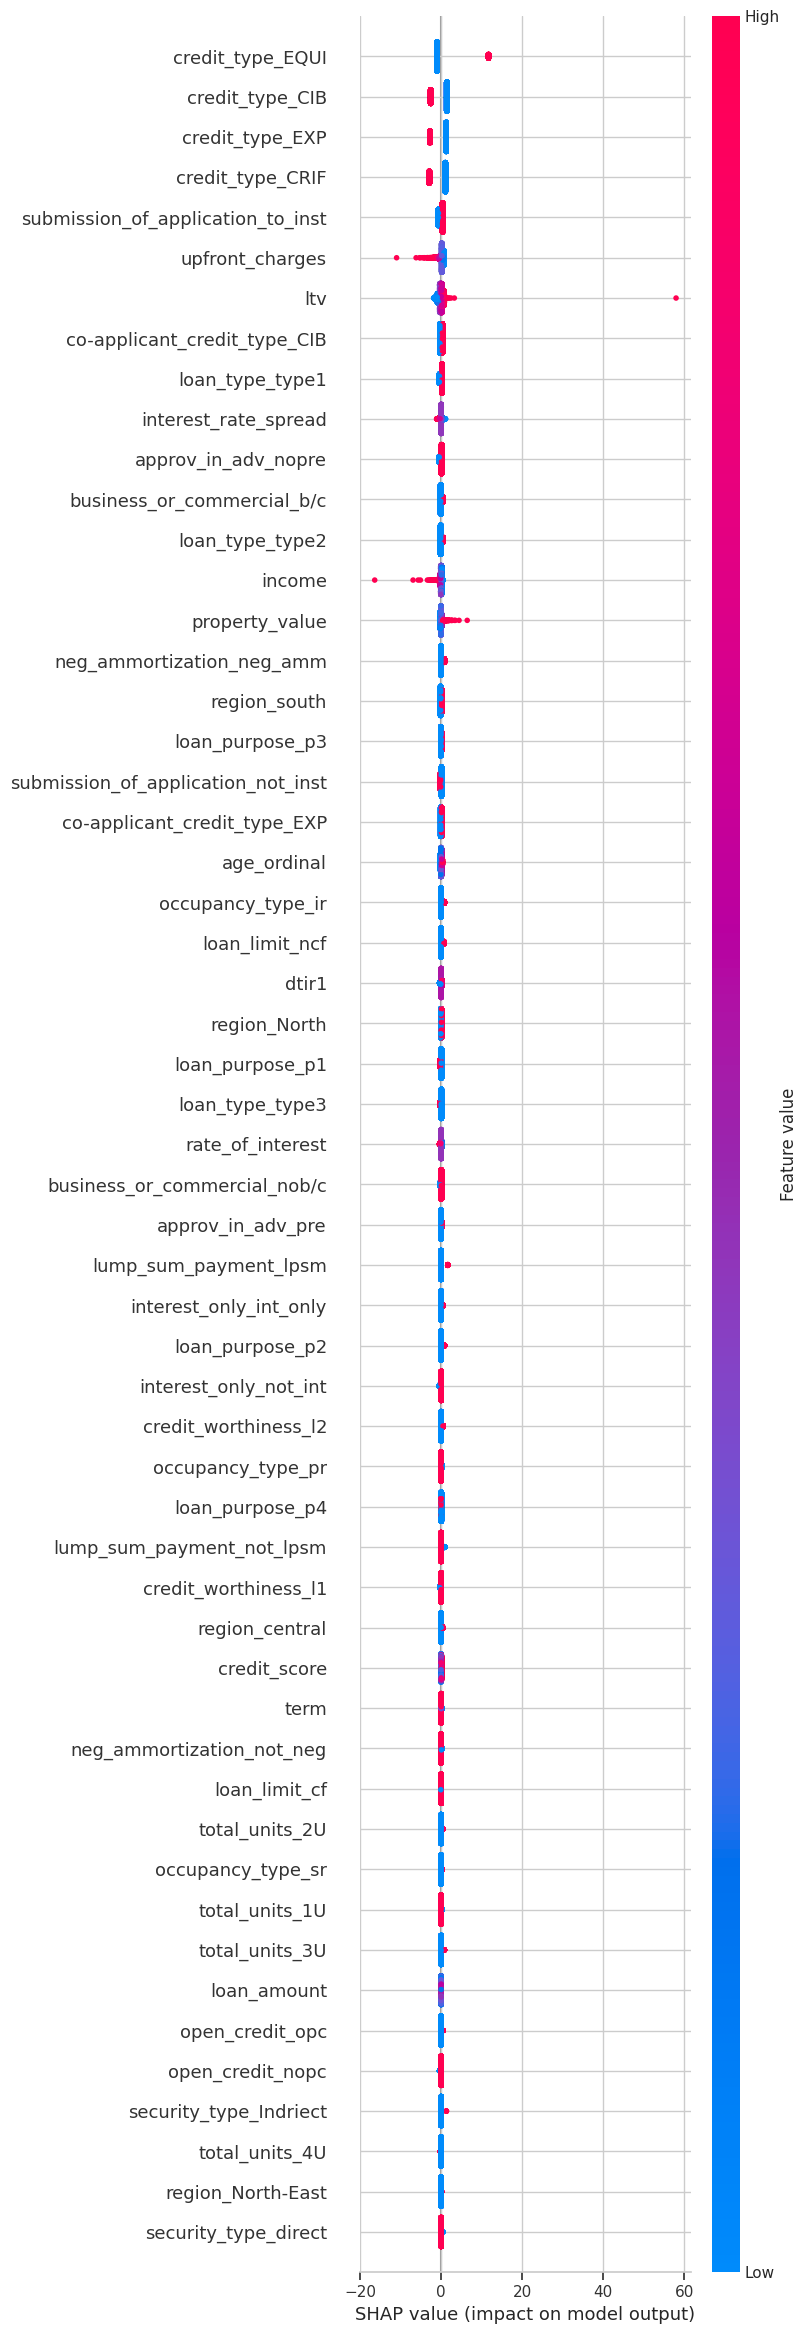

In [38]:
import shap

# Function to accurately extract feature names from ColumnTransformer
def get_feature_names(column_transformer):
    """Get feature names from a ColumnTransformer"""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            output_features.extend(features)  # Append original feature names
            continue
        transformer = pipe.named_steps['onehot'] if 'onehot' in pipe.named_steps else pipe
        if hasattr(transformer, 'get_feature_names_out'):
            feature_names = transformer.get_feature_names_out(features)
            output_features.extend(feature_names)
        else:
            output_features.extend(features)

    return output_features

# Apply this function to your preprocessor
feature_names = get_feature_names(pipeline_lr.named_steps['preprocessor'])
# Transform the training and test datasets
X_train_processed = pipeline_lr.named_steps['preprocessor'].transform(X_train)
X_test_processed = pipeline_lr.named_steps['preprocessor'].transform(X_test)
# Convert the processed data back to a DataFrame for ease of use with SHAP
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Create a SHAP explainer for the logistic regression model
explainer = shap.Explainer(pipeline_lr.named_steps['classifier'], X_train_processed_df)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_processed_df)

# For individual predictions
shap.initjs()
i = 0  # Example index
shap.force_plot(explainer.expected_value, shap_values[i], X_test_processed_df.iloc[i])
total_features = X_test_processed_df.shape[1]

# Create a dot plot summary plot with simplified color scheme
shap.summary_plot(shap_values, X_test_processed_df, feature_names=feature_names, plot_type='dot', color='coolwarm', max_display=total_features)


I employed SHAP values to analyze feature contributions in my logistic regression model, enhancing my understanding of how each feature impacts predictions.

**Interpretation:** The cross-validation results shows that the feature elimination process was successful. The selected features to retain are providing sufficient information for the model to make accurate and consistent predictions.

## Logistic Regression-  Weighted Version

This part is an experiment for the weight strategy in Logistic Regression.

- Remember that the data is imbalanced. Therefore, I used stratify and SMOTE tecniques.Also class_weight is assigned to "balanced".
- For curiosity I want to manually assign a weight to understand to evaluate  "balanced" options performance.  

In [39]:
# Define different weight for the lower class (class 1)
class_weights = {0: 1, 1: 3}  # You can adjust the weight for class 1 as needed

logistic_regression_classifier = LogisticRegression(
    random_state=42,
    class_weight=class_weights
)

pipeline_lr_weighted = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', logistic_regression_classifier)
])

# Train the pipeline
pipeline_lr_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_lr_weighted.predict(X_test)


In [40]:
lr_metrics_weighted = EvaluationMetrics(pipeline_lr_weighted, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = lr_metrics_weighted.print_scores()
lr_metrics_weighted.record_results('Logistic Regression', train_results, test_results, val_results)
lr_metrics_weighted.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,Logistic Regression,0.565296,0.565296,0.791617,0.585734,0.683762,0.572694,0.572694,0.793046,0.593706,0.679055,0.56604,0.56604,0.790821,0.586668,0.688725


- **Interpretation:** The 'class_weight=balanced' option yields better results because it automatically calculates class weights based on the training data's class frequencies, effectively addressing the challenge of imbalanced datasets and improving model performance
---



## Logistic Regression- Hyperparameter tuning (Grid Search)

In [41]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid to search
param_grid = {
    'classifier__penalty': ['l1', 'l2'],         # Regularization penalty (L1 or L2)
    'classifier__C': [0.001, 0.01, 0.1, 1.0],    # Inverse of regularization strength
    'classifier__solver': ['liblinear', 'saga']  # Solver algorithm
}

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(pipeline_lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV object to the training data with updated features
grid_search_lr.fit(X_train, y_train)

# You can then check the best parameters and the best score
print("Best parameters:", grid_search_lr.best_params_)
print("Best ROC-AUC score:", grid_search_lr.best_score_)


Best parameters: {'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best ROC-AUC score: 0.8547409607413672


Best Hyperparameters:
{'classifier__C': 1.0, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best Score (Accuracy): 0.8553620540836773


In [42]:

# Define a pipeline with preprocessing and the logistic regression model with best parameters
best_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Your preprocessing steps
    ('classifier', LogisticRegression(C=1.0, max_iter=100, penalty='l1', solver='liblinear'))  # Best parameters
])

# Fit the pipeline to the updated training data
best_lr_pipeline.fit(X_train, y_train)

# Make predictions using the pipeline on the updated test data
y_pred = best_lr_pipeline.predict(X_test)


In [43]:
best_lr_metrics = EvaluationMetrics(best_lr_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = best_lr_metrics.print_scores()
best_lr_metrics.record_results('Logistic Regression Grid Search', train_results, test_results, val_results)
best_lr_metrics.model_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Train Log Loss,Test Accuracy,Test Recall,Test Precision,Test F1-Score,Test Log Loss,Validation Accuracy,Validation Recall,Validation Precision,Validation F1-Score,Validation Log Loss
0,Logistic Regression Grid Search,0.869072,0.869072,0.877265,0.854212,0.338375,0.871987,0.871987,0.880351,0.857784,0.336652,0.866093,0.866093,0.874335,0.850449,0.345307


- I conducted a grid search to find the optimal hyperparameter and run the model with best parameters.

### Logistic Regression - Cross validation

In [44]:
# Create an instance of the EvaluationMetrics class
cross_lr_metrics = EvaluationMetrics(best_lr_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)

# Perform cross-validation
mean_cv_score, std_cv_score = cross_lr_metrics.cross_validation(cv=2)

# Display the mean and standard deviation of cross-validation scores
print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")


Mean Cross-Validation Score: 0.8535
Standard Deviation of Cross-Validation Scores: 0.0019


**Interpretation:** A mean Cross-Validation Score of 0.8535 with a low Standard Deviation indicates that the logistic regression model is performing well on the training data and is relatively stable in its performance across different subsets of the data.  

<a name="KNN"></a>
# K-Nearest Neighbors (KNN)

Here I will use KNN. This approach can be beneficial in financial contexts like loan default prediction, where understanding the nuances in borrower profiles is crucial for accurate risk assessment.


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


# Create a KNN classifier pipeline with SMOTE
knn_pipeline_with_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Train the model on the training set
knn_pipeline_with_smote.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = knn_pipeline_with_smote.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = knn_pipeline_with_smote.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     15684
           1       0.73      0.94      0.82      5129

    accuracy                           0.90     20813
   macro avg       0.85      0.91      0.87     20813
weighted avg       0.92      0.90      0.90     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      6722
           1       0.73      0.95      0.82      2199

    accuracy                           0.90      8921
   macro avg       0.85      0.92      0.88      8921
weighted avg       0.92      0.90      0.90      8921



**Interpratation:** The classification report reveals an accuracy of 0.90 for both sets. Class 0 is identified accurately with few false positives, while Class 1, despite more false positives, is detected effectively. Overall, the model shows balanced performance with a focus on minimizing false positives.

In [ ]:
parameter_grid = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(knn_pipeline_with_smote, parameter_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
y_val_pred = grid_search.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

y_test_pred = grid_search.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


**Note:** Above grid search is taking longer than initially anticipated. Once the grid search is complete, I will  share the findings and show the best parameters.

In [46]:
# Cross-Validation
stratified_cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(knn_pipeline_with_smote, X_train, y_train, cv=stratified_cv)
mean_score_knn = np.mean(scores)
std_dev_knn = np.std(scores)
# Display the mean and standard deviation of cross-validation scores
print(f"Mean Cross-Validation Score: {mean_score_knn:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_dev_knn:.4f}")


Mean Cross-Validation Score: 0.8943
Standard Deviation of Cross-Validation Scores: 0.0005


**Interpretation:** Cross-validation scores show that model performs well across different subsets of the data.

<a name="SVM"></a>
### Support Vector Machine (SVM)

FIrst I used below code and the results are shown in "Loan_Default_Prediction.ipynb" in main branch. However it was computationally expensive. Therefore I try another alternative that can be seen in SVM-RandovOverSampler Section

In [ ]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Create an SVM classifier
svm_classifier = SVC(probability=True, random_state=42)
calibrated_classifier = CalibratedClassifierCV(svm_classifier, method='sigmoid')

# Create an SVM pipeline
svm_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Reuse the preprocessing steps
    ('smote', SMOTE(random_state=42)),  # Reuse SMOTE
    ('classifier', calibrated_classifier)  # Use the calibrated SVM classifier
 ])

#Train the SVM pipeline
svm_pipeline.fit(X_train, y_train)

In [ ]:

svm_metrics = EvaluationMetrics(svm_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)
train_results, test_results, val_results = svm_metrics.print_scores()
svm_metrics.record_results('SVM', train_results, test_results, val_results)

In [ ]:
svm_metrics.model_df

- SVM is computationally expensive due to its complexity, especially with large datasets as it involves solving a quadratic optimization problem


## SVM-RandomOver Sampler

- To speed up my code, I choose to implement RandomOverSampler. This method streamlines the oversampling process by randomly replicating instances from the minority class. It  offers a less  alternative to synthetic sample generation as done by SMOTE. Adopting RandomOverSampler is expected to expedite training times while effectively managing class imbalance in the dataset.
- I will employ cross-validation to evaluate the effectiveness of using RandomOverSampler, ensuring the model's quality and its ability to generalize across different data subsets.







In [ ]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Create an SVM classifier
svm_classifier = SVC(probability=True, random_state=42)
calibrated_classifier = CalibratedClassifierCV(svm_classifier, method='sigmoid')

# Create an SVM pipeline with RandomOverSampler
svm_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Reuse the preprocessing steps
    ('oversampler', ros),            # Use RandomOverSampler
    ('classifier', calibrated_classifier)  # Use the calibrated SVM classifier
])

# Train the SVM pipeline
svm_pipeline.fit(X_train, y_train)


### SVM- Cross Validation

In [ ]:
cross_svm_metrics = EvaluationMetrics(svm_pipeline, X_train, X_test, y_train, y_test, X_val, y_val)

# Perform cross-validation
mean_cv_score, std_cv_score = cross_svm_metrics.cross_validation(cv=2)

# Display the mean and standard deviation of cross-validation scores
print(f"Mean Cross-Validation Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.4f}")


<a name="rf"></a>
## Random Forest with Principal Component Analysis (PCA)

I used PCA because my Random Forest model was showing signs of overfitting. PCA helped mitigate overfitting for several reasons:

- Feature Reduction: PCA reduces the feature space, focusing on principal components, which helps in preventing the model from fitting too closely to the training data.

- Noise and Redundancy Elimination: By transforming features, PCA removes noise and redundancy, further aiding in reducing the overfitting problem.






In [48]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Create a PCA preprocessing step
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Update your existing preprocessing pipeline (assuming 'preprocessor' is already defined)
pca_preprocessor = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca)
])

# Apply PCA to the training data
X_train_pca = pca_preprocessor.fit_transform(X_train)

# Apply the same transformation to the validation and test sets
X_val_pca = pca_preprocessor.transform(X_val)
X_test_pca = pca_preprocessor.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create and train a Random Forest model on the PCA-transformed training data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predict and evaluate on the validation set
y_val_pred = rf_model.predict(X_val_pca)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Predict and evaluate on the test set
y_test_pred = rf_model.predict(X_test_pca)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15684
           1       0.96      0.87      0.91      5129

    accuracy                           0.96     20813
   macro avg       0.96      0.93      0.94     20813
weighted avg       0.96      0.96      0.96     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6722
           1       0.95      0.87      0.91      2199

    accuracy                           0.96      8921
   macro avg       0.96      0.93      0.94      8921
weighted avg       0.96      0.96      0.96      8921



In [ ]:
## Random Forests- Cross validation

<a name="xgboost"></a>
## XGBoost (eXtreme Gradient Boosting) with PCA

Note that here I will used the pca pipeline.



In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

pca = PCA(n_components=0.95)  # Retain 95% of the variance
xgb_model = XGBClassifier(random_state=42)

# Create a combined pipeline
combined_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Initial preprocessing
    ('pca', pca),                    # PCA step
    ('xgb_model', xgb_model)         # XGBoost classifier
])

# Fit the combined pipeline to training data
combined_pipeline.fit(X_train, y_train)

y_val_pred = combined_pipeline.predict(X_val)
y_test_pred = combined_pipeline.predict(X_test)




In [52]:
# Print the classification report for the validation set
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred))

# Print the classification report for the test set
print("Test Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15684
           1       0.94      0.96      0.95      5129

    accuracy                           0.97     20813
   macro avg       0.96      0.97      0.96     20813
weighted avg       0.97      0.97      0.97     20813

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6722
           1       0.93      0.95      0.94      2199

    accuracy                           0.97      8921
   macro avg       0.96      0.96      0.96      8921
weighted avg       0.97      0.97      0.97      8921



<a name="Lightgbm"></a>

## Lightgbm with PCA

In [54]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Create and train the LightGBM model on PCA-transformed training data
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train_pca, y_train)

# Predict on the PCA-transformed validation set
y_val_pred_lgb = lgb_model.predict(X_val_pca)
print("Validation Set Performance (LightGBM):")
print(classification_report(y_val, y_val_pred_lgb))

# Predict on the PCA-transformed test set
y_test_pred_lgb = lgb_model.predict(X_test_pca)
print("Test Set Performance (LightGBM):")
print(classification_report(y_test, y_test_pred_lgb))


[LightGBM] [Info] Number of positive: 29311, number of negative: 89625
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 118936, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246443 -> initscore=-1.117671
[LightGBM] [Info] Start training from score -1.117671
Validation Set Performance (LightGBM):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     15684
           1       0.92      0.90      0.91      5129

    accuracy                           0.96     20813
   macro avg       0.95      0.94      0.94     20813
weighted avg       0.96      0.96      0.96     20813

Test Set Performance (LightGBM):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      67

### LightGBM with PCA- Cross Validation

In [57]:
stratified_cv = StratifiedKFold(n_splits=5)

# Perform cross-validation
cv_scores = cross_val_score(lgbm_pipeline, X_train, y_train, cv=stratified_cv, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the results
print(f"Mean CV Accuracy: {mean_cv_score:.4f}")
print(f"CV Standard Deviation: {std_cv_score:.4f}")

<a name="DecisionTree"></a>
## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier


pca = PCA(n_components=0.95)

# Create the Decision Tree Classifier pipeline with SMOTE and PCA
decision_tree_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Initial preprocessing
    ('pca', pca),                    # PCA step
    ('smote', SMOTE(random_state=42)),            # SMOTE for oversampling
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Train the pipeline on the training set
decision_tree_pipeline.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = decision_tree_pipeline.predict(X_val)
print("Validation Set Performance:")
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = decision_tree_pipeline.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     15684
           1       0.82      0.88      0.85      5129

    accuracy                           0.92     20813
   macro avg       0.89      0.91      0.90     20813
weighted avg       0.93      0.92      0.93     20813

Test Set Performance:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      6722
           1       0.82      0.88      0.85      2199

    accuracy                           0.92      8921
   macro avg       0.89      0.91      0.90      8921
weighted avg       0.92      0.92      0.92      8921



In [61]:
print("Depth of the decision tree:", decision_tree_pipeline.named_steps['classifier'].tree_.max_depth)


Depth of the decision tree: 60


In [62]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(decision_tree_pipeline, X_train, y_train, cv=3)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.92047117 0.92160424 0.91618111]


## Decision Tree- Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Classifier pipeline
decision_tree_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


<a name="Neural"></a>
## Neural Networks with PCA

In [63]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

# Assuming 'preprocessor' is your initial preprocessing steps without PCA
# Define PCA
pca = PCA(n_components=0.95)

# Apply initial preprocessing and then PCA to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_train_pca = pca.fit_transform(X_train_processed)

# Apply SMOTE after PCA
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Define the neural network structure
model = Sequential()
model.add(Dense(64, input_shape=(X_train_smote.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32)


Epoch 1/10
5602/5602 [==============================] - 19s 3ms/step - loss: 0.0487 - accuracy: 0.9845
Epoch 2/10
5602/5602 [==============================] - 22s 4ms/step - loss: 0.0097 - accuracy: 0.9979
Epoch 3/10
5602/5602 [==============================] - 33s 6ms/step - loss: 0.0066 - accuracy: 0.9985
Epoch 4/10
5602/5602 [==============================] - 19s 3ms/step - loss: 0.0047 - accuracy: 0.9989
Epoch 5/10
5602/5602 [==============================] - 17s 3ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 6/10
5602/5602 [==============================] - 16s 3ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 7/10
5602/5602 [==============================] - 17s 3ms/step - loss: 0.0031 - accuracy: 0.9992
Epoch 8/10
5602/5602 [==============================] - 17s 3ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 9/10
5602/5602 [==============================] - 18s 3ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 10/10
5602/5602 [==============================] - 17s 3ms/step - l

Seeing consistently perfect scores across multiple models, including LightGBM, is indeed quite unusual and suggests there might be some fundamental characteristic of your dataset that's leading to these results.

### Neural Networks with PCA- Grid Search

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train_smote.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [64, 128]
}

# Conduct Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train_smote, y_train_smote)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<a name="finale"></a>
 ## Conclusion and Observations

 - In this project, I have explored several models to predict loan defaults, utilizing a dataset sourced from Kaggle. An important observation that emerged during the course of this study is related to the accuracy of the predictions. As noted in the Kaggle's data page, several users have reported achieving 100% accuracy on this dataset. Such a high level of accuracy often signals potential issues, including but not limited to data leakage or issues with data quality.

- In my analysis, models like Logistic Regression and KNN demonstrated promising results, showing good performance without signs of overfitting. However, several other models initially exhibited overfitting, as indicated by their 100% accuracy rates. This led to a thorough revision and reassessment of the models and the data handling processes, focusing on key areas that might contribute to overfitting:
  
   1. *Data Leakage:* Ensuring that no information from the test data was inadvertently being used during training. This involved a careful examination of the data processing and feature engineering steps.

   2. *Class Imbalance:* Addressing the imbalance in the dataset, as an uneven distribution of classes can often lead to misleadingly high accuracy, particularly for the majority class. Techniques like SMOTE were employed to mitigate this issue.

- As previosly mentioned, I used PCA to mitigate overfitting for several reasons:

  1. Feature Reduction: PCA reduces the feature space, focusing on principal components, which helps in preventing the model from fitting too closely to the training data.

  2. Noise and Redundancy Elimination: By transforming features, PCA removes noise and redundancy, further aiding in reducing the overfitting problem.



 -  <font color=”blue”> Next Steps: </font>
In the next phase of this project, I plan to acquire a more comprehensive and representative dataset, one that incorporates domain knowledge and reflects the dynamics of the loan industry. The goal is to enhance the model's robustness and accuracy, making it more reflective of real-world scenario.




